## Extracción del Archivo Tratado

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/tabela tratada (1).csv')

In [3]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

## Eliminar columnas irrelevantes

In [5]:
df = datos.drop(columns='customerID', axis=1)

In [6]:
df_clean = df.copy()

In [7]:
# cambiar las columnas para reducir colinearidad y la alta tasa de correlación
cols_to_fix = ['internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
               'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

In [8]:
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No'})

## Encoding

In [9]:
variables_categoricas = df.select_dtypes(include='object').columns.tolist()

In [10]:
# Eliminar las filas con valores nulos en la columna 'account.Charges.Total' y 'Total.Day'
df_clean = df_clean.dropna(subset=['account.Charges.Total','Total.Day'])

variables_categoricas = df_clean.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df_clean, columns=variables_categoricas, drop_first=True)

In [11]:
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [12]:
# Verificar el número de valores nulos por columna
print(df_encoded.isnull().sum())

customer.SeniorCitizen                           0
customer.tenure                                  0
Total.Day                                        0
account.Charges.Monthly                          0
account.Charges.Total                            0
Churn_Yes                                        0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fiber optic             0
internet.InternetService_No                      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_Yes                        0
internet.DeviceProtection_Yes                    0
internet.TechSupport_Yes                         0
internet.StreamingTV_Yes                         0
internet.StreamingMovies_Yes   

### correlación entre variables

In [13]:
corr = df_encoded.corr()

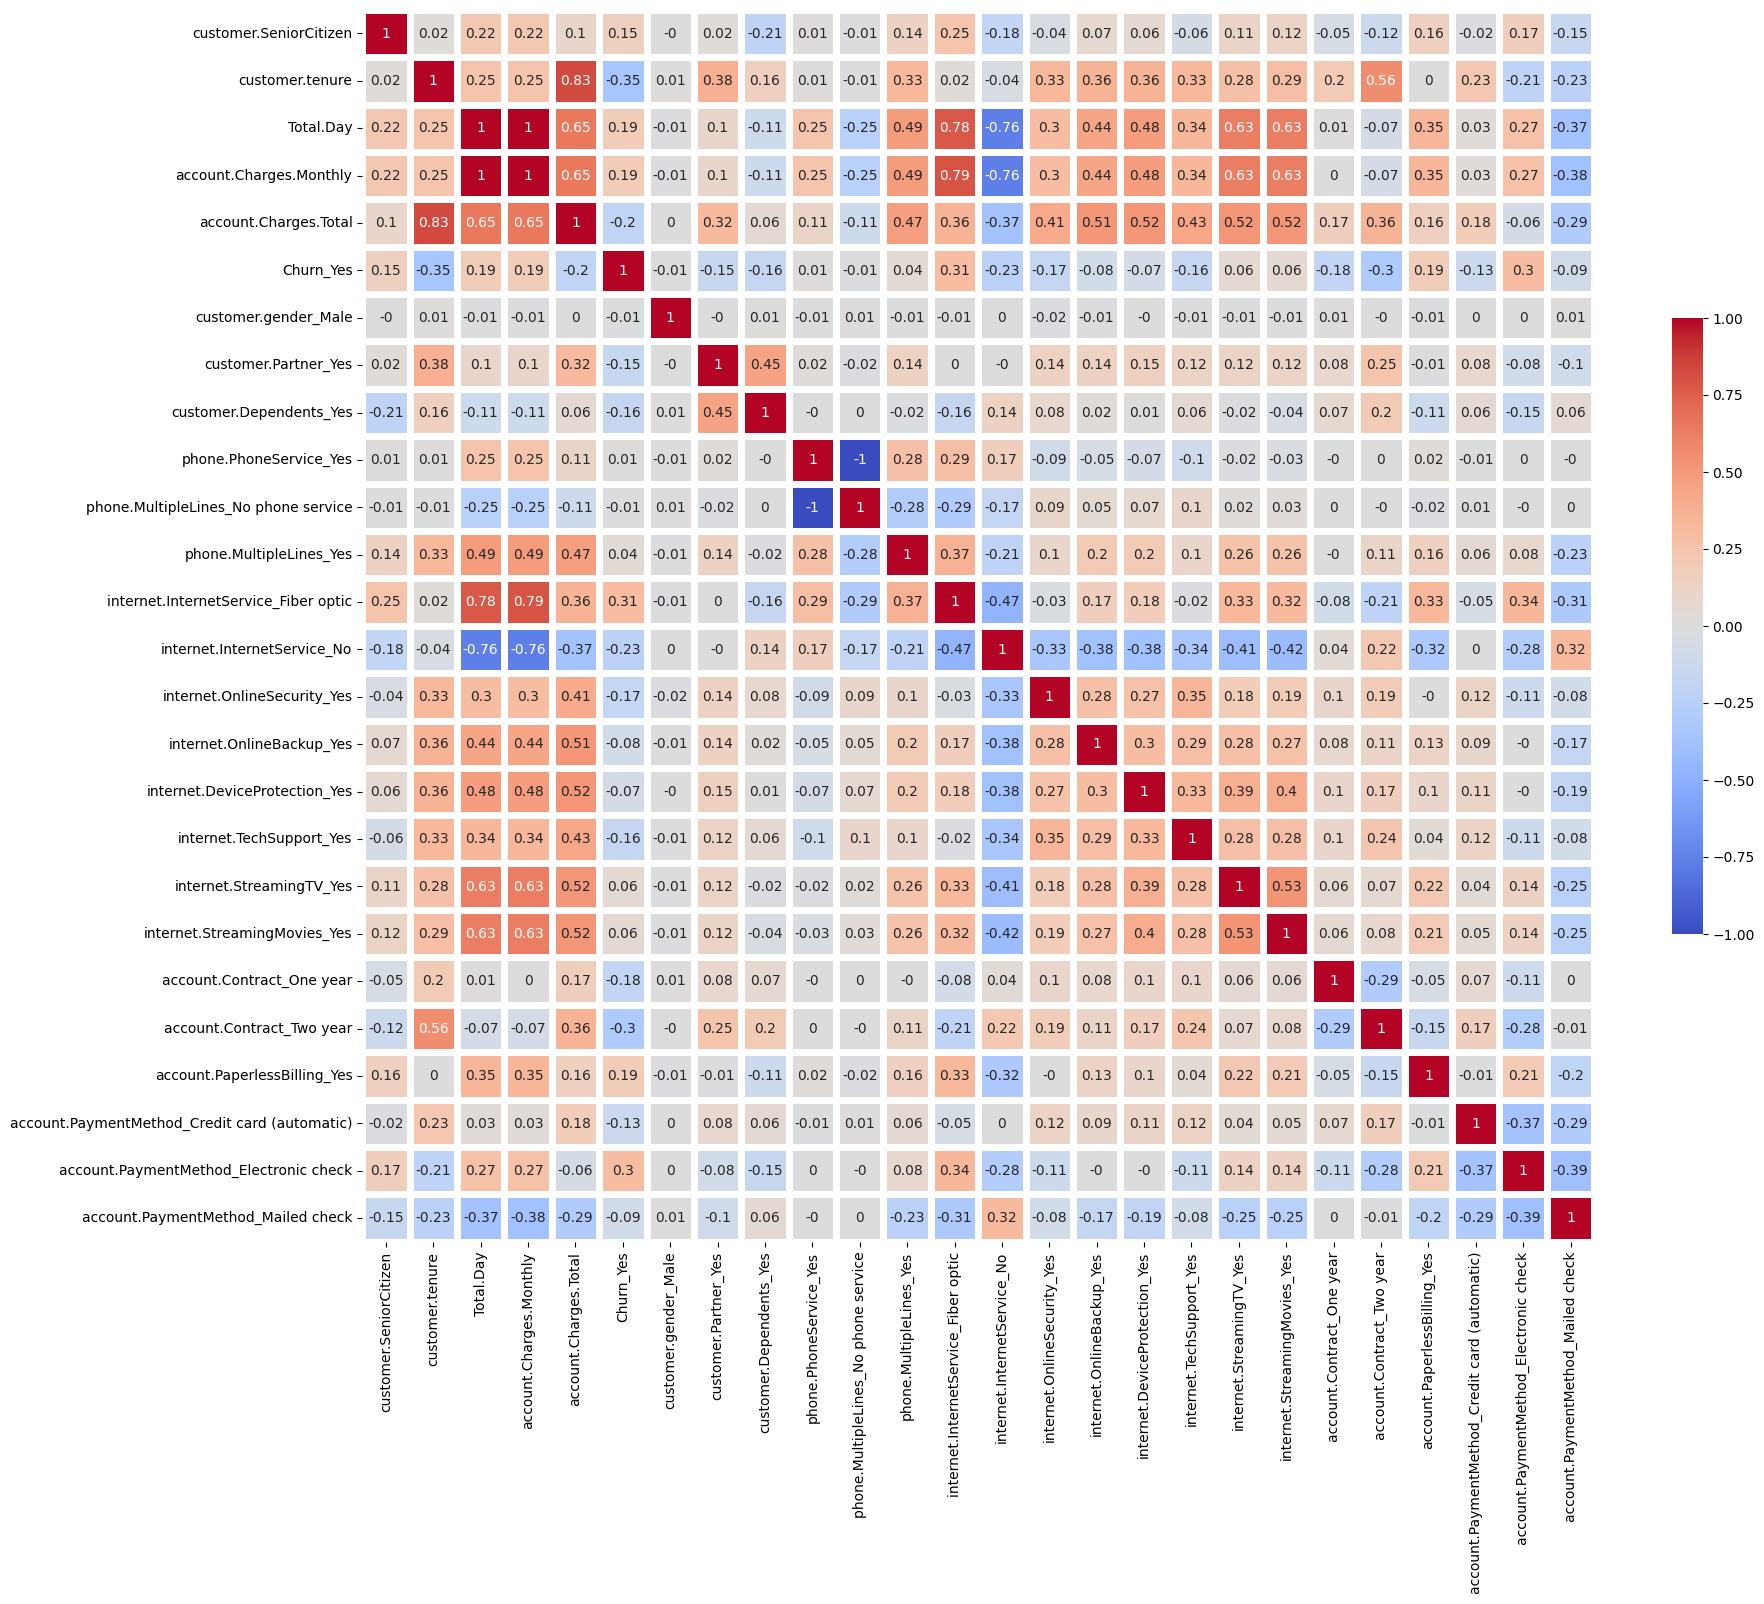

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 16))
ax  = sns.heatmap(np.round(corr,2),vmax=1,vmin=-1,center=0,square=True,linewidths=5,annot=True,cbar_kws={"shrink": .5}, cmap='coolwarm')
plt.show()

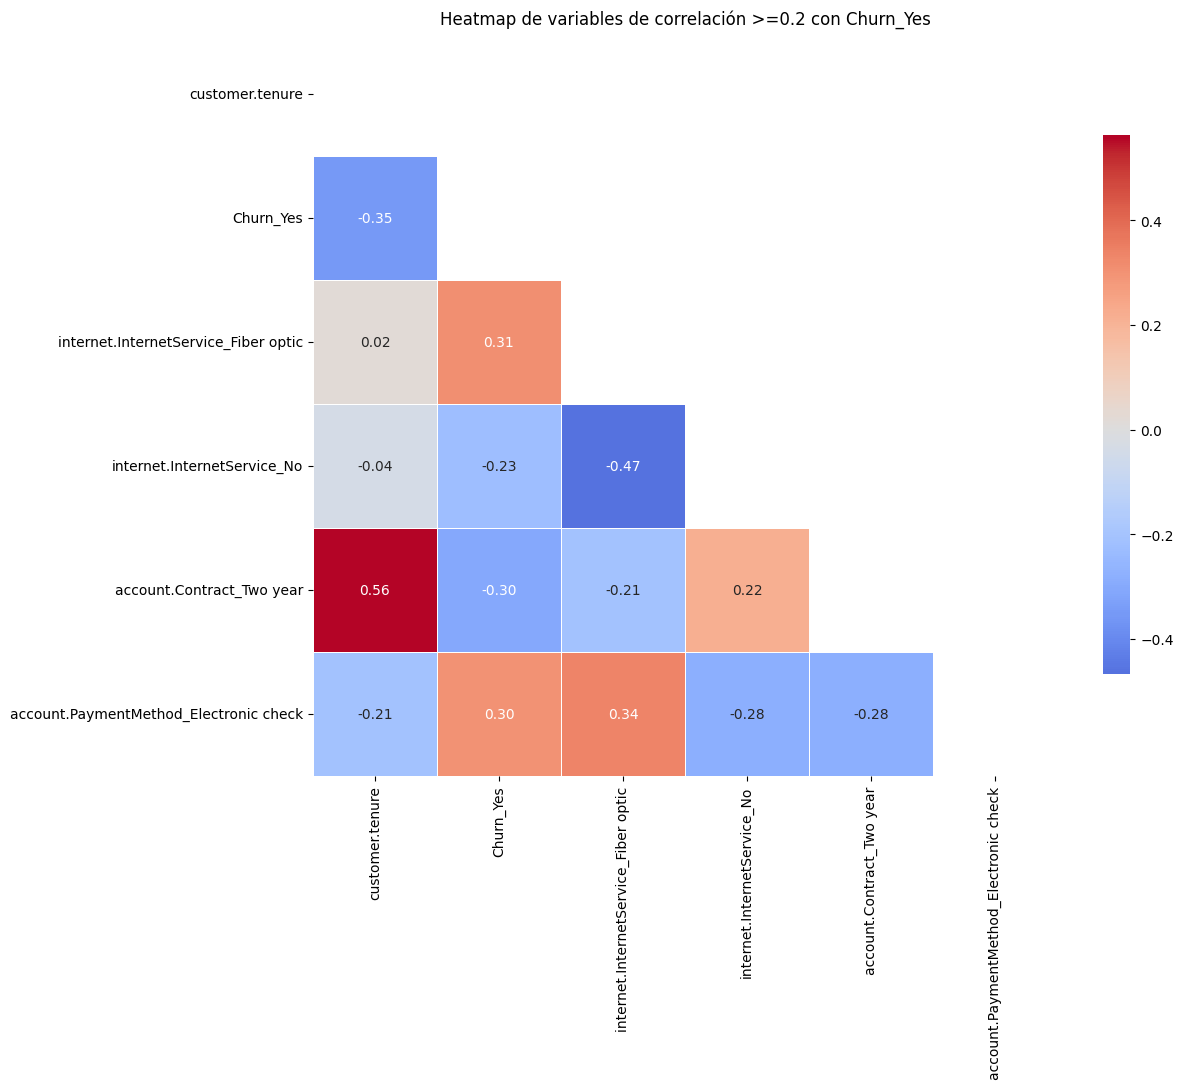

In [15]:
#Define la variable objetivo con la que se calculará la correlación
targer_var = 'Churn_Yes'
#Establece el umbral de correlación. Solo se considerarán las variables cuya correlación absoluta con 'Churn_Yes' sea mayor o igual a 0.2.
limiar = 0.2
# selecciona las conlumas que cumplan el umbral de correlación.
variables_relevantes = corr.index[abs(corr[targer_var])>=limiar].tolist()
# Asegura que la variable objetivo ('Churn_Yes') esté incluida en la lista variables_relevantes
if targer_var not in variables_relevantes:
    variables_relevantes.append(targer_var)
# Submatrix de correlación con las variables de interes
corr_filtrada = corr.loc[variables_relevantes,variables_relevantes]
#Crea una máscara para ocultar la parte superior del heatmap (incluida la diagonal).
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr_filtrada,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink":0.7},
            mask=mascara)
plt.title(f'Heatmap de variables de correlación >={limiar} con {targer_var}')
plt.show()

### Análisis de multicolinealidad

 calcular el Factor de Inflación de la Varianza (VIF)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [17]:
X = df_encoded.drop(columns=['Churn_Yes'])
X_const = add_constant(X)

In [18]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
# Exibir los resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


In [19]:
import statsmodels.api as sm
# copiar el dataframe original para modificarlo
X_filtered = X_const.copy()
# Remover las variables con multicolinearidad preferiblemente VIF=inf
cols_to_drop = [
    "phone.PhoneService_Yes", # Altamente colinear con "Multiplelines"
    "phone.MultipleLines_No phone service", # Redundate con ausencia de telefono
]
X_filtered.drop(columns = cols_to_drop, inplace=True )
# remover redundancias fuertes entre variables numericas
#'Total day' e 'charge.total' son derivados de 'monthly' y 'tenure'
X_filtered.drop(columns = ['Total.Day'], inplace=True )
# remover redundancia entre dummies de la misma variable categorica
X_filtered.drop(columns = ['internet.InternetService_No'], inplace=True )
# garantizar que los datos esten en float
X_filtered = X_filtered.astype(float)
# Recalcular o vif
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]
# Exibir los resultados
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [20]:
X_filtered.drop(columns=["account.Charges.Total"], inplace=True)

In [21]:
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_filtered.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

In [22]:
display (vif_data_final.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


## Verificación de la Proporción de Cancelación (Churn)

In [23]:
df_encoded['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.734215
True,0.265785


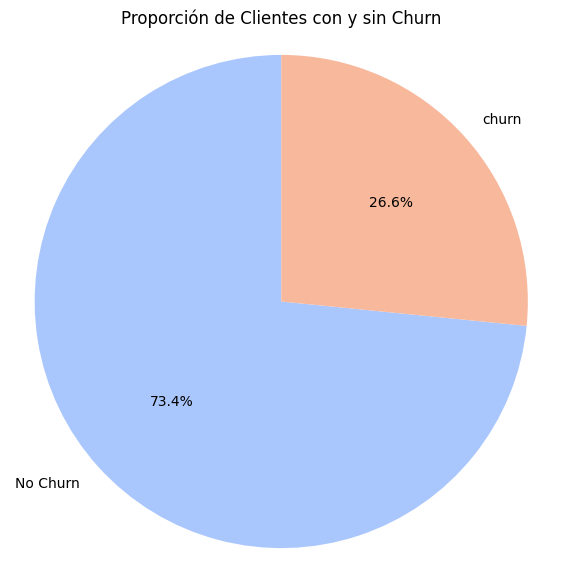

In [24]:
churn_counts = df_encoded['Churn_Yes'].value_counts(normalize=True)
labels = ['No Churn', 'churn']
# Use a color palette that includes red and blue tones
colors = sns.color_palette("coolwarm", 2)

plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporción de Clientes con y sin Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Modelos Predictivos

### Separación de los modelos de entrenamiento y prueba

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [26]:
X= df_encoded.drop(columns=['Churn_Yes'])
y= df_encoded['Churn_Yes']

In [27]:
X, X_test,y, y_test = train_test_split(X, y,test_size = 0.15, stratify=y, random_state=42)
X_train, X_val,y_train, y_val = train_test_split(X, y,stratify=y, random_state=42)

### Normalización

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

### Balanceo

Balanceo_oversampling

In [29]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

Balanceo_undersampling

In [31]:
# Inicializar NearMiss (puedes experimentar con las versiones 1, 2 o 3)
nearmiss = NearMiss(version=3)

# Aplicar NearMiss al conjunto de entrenamiento
X_train_bal_nearmiss, y_train_bal_nearmiss = nearmiss.fit_resample(X_train_scaled, y_train)

### Tipos de modelo predictivo

instancias

In [54]:
# Instanciar modelo de regression logistica
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)
# previstos
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]

# Instanciar modelo randomforest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
# previstos
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]

# Instanciar modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)

# Predecir en el conjunto de validación
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Instanciar modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Predecir en el conjunto de validación
y_pred_dt = dt.predict(X_test_scaled)
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

## Evaluación de los Modelos

In [55]:
#evaluación del modelo de regresión logística
print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_val, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_val, y_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_pred_lr))

Regresión Logística:
Accuracy: 0.7638795986622073
ROC AUC Score: 0.8520621418379193
Matriz de Confusión:
 [[826 272]
 [ 81 316]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.75      0.82      1098
        True       0.54      0.80      0.64       397

    accuracy                           0.76      1495
   macro avg       0.72      0.77      0.73      1495
weighted avg       0.81      0.76      0.78      1495



In [56]:
#evaluación del modelo Random Forest
print("Random forest:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

Random forest:
Accuracy: 0.8073578595317725
ROC AUC Score: 0.8520621418379193
Matriz de Confusión:
 [[959 139]
 [149 248]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.87      0.87      1098
        True       0.64      0.62      0.63       397

    accuracy                           0.81      1495
   macro avg       0.75      0.75      0.75      1495
weighted avg       0.81      0.81      0.81      1495



In [57]:
# Evaluación del modelo KNN
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba_knn))
print("Matriz de Confusión:\n", confusion_matrix(y_val, y_pred_knn))
print("Classification Report:\n", classification_report(y_val, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.68561872909699
ROC AUC Score: 0.7559726179497415
Matriz de Confusión:
 [[749 349]
 [121 276]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.68      0.76      1098
        True       0.44      0.70      0.54       397

    accuracy                           0.69      1495
   macro avg       0.65      0.69      0.65      1495
weighted avg       0.75      0.69      0.70      1495



In [58]:
# Evaluación del modelo de Árbol de Decisión
print("Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_val, y_proba_dt))
print("Matriz de Confusión:\n", confusion_matrix(y_val, y_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_pred_dt))

Árbol de Decisión:
Accuracy: 0.7418060200668897
ROC AUC Score: 0.6980117272990048
Matriz de Confusión:
 [[871 227]
 [159 238]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.79      0.82      1098
        True       0.51      0.60      0.55       397

    accuracy                           0.74      1495
   macro avg       0.68      0.70      0.69      1495
weighted avg       0.76      0.74      0.75      1495



Curva Roc

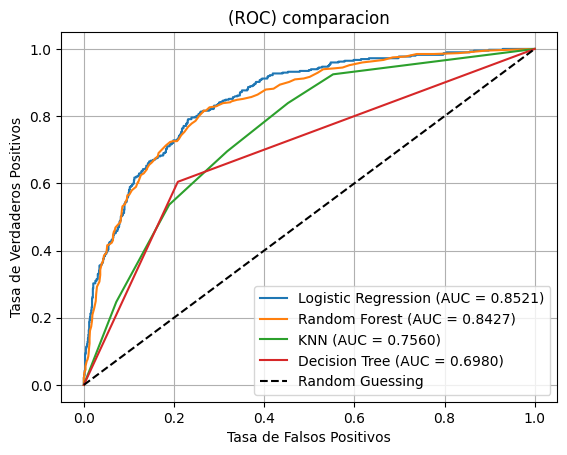

El AUC para el modelo de Regresión Logística es: 0.8521
El AUC para el modelo de Random Forest es: 0.8427
El AUC para el modelo de KNN es: 0.7560
El AUC para el modelo de Árbol de Decisión es: 0.6980


In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular la curva ROC para cada modelo
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val, y_proba_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_proba_rf)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, y_proba_knn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, y_proba_dt)


# Plotear la curva ROC
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, y_proba_lr):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_val, y_proba_rf):.4f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_score(y_val, y_proba_knn):.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_val, y_proba_dt):.4f})')

plt.plot([0, 1], [0, 1], 'k--',label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('(ROC) comparacion')
plt.legend()
plt.grid(True)
plt.show()

print(f"El AUC para el modelo de Regresión Logística es: {roc_auc_score(y_val,y_proba_lr):.4f}")
print(f"El AUC para el modelo de Random Forest es: {roc_auc_score(y_val,y_proba_rf):.4f}")
print(f"El AUC para el modelo de KNN es: {roc_auc_score(y_val,y_proba_knn):.4f}")
print(f"El AUC para el modelo de Árbol de Decisión es: {roc_auc_score(y_val,y_proba_dt):.4f}")

Curvas de Precision-Recall

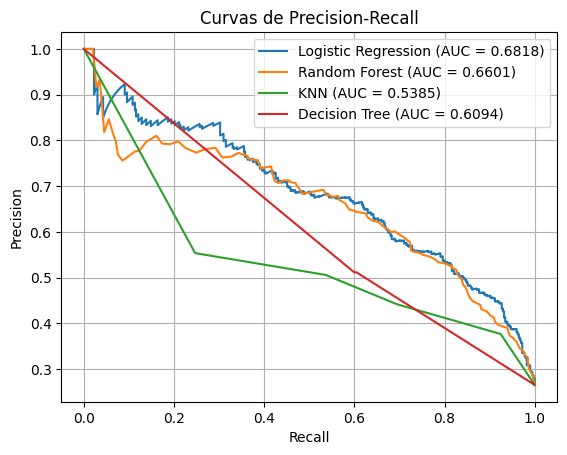

El Área bajo la curva Precision-Recall (AUC) para el modelo de Regresión Logística es: 0.6818
El Área bajo la curva Precision-Recall (AUC) para el modelo de Random Forest es: 0.6601
El Área bajo la curva Precision-Recall (AUC) para el modelo de KNN es: 0.5385
El Área bajo la curva Precision-Recall (AUC) para el modelo de Árbol de Decisión es: 0.6094


In [60]:
from sklearn.metrics import precision_recall_curve, auc

# Calcular la curva Precision-Recall para cada modelo
precision_lr, recall_lr, _ = precision_recall_curve(y_val, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

precision_rf, recall_rf, _ = precision_recall_curve(y_val, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

precision_knn, recall_knn, _ = precision_recall_curve(y_val, y_proba_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

precision_dt, recall_dt, _ = precision_recall_curve(y_val, y_proba_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

# Plotear la curva Precision-Recall
plt.figure()
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {pr_auc_lr:.4f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {pr_auc_rf:.4f})')
plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {pr_auc_knn:.4f})')
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AUC = {pr_auc_dt:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas de Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

print(f"El Área bajo la curva Precision-Recall (AUC) para el modelo de Regresión Logística es: {pr_auc_lr:.4f}")
print(f"El Área bajo la curva Precision-Recall (AUC) para el modelo de Random Forest es: {pr_auc_rf:.4f}")
print(f"El Área bajo la curva Precision-Recall (AUC) para el modelo de KNN es: {pr_auc_knn:.4f}")
print(f"El Área bajo la curva Precision-Recall (AUC) para el modelo de Árbol de Decisión es: {pr_auc_dt:.4f}")

probando nuestros datos championg

In [61]:
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

In [62]:
lr = LogisticRegression(random_state=42)
lr.fit(X_bal, y_bal)
# previstos
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Regresión Logística:
Accuracy: 0.7374407582938388
ROC AUC Score: 0.7969815668202764
Matriz de Confusión:
 [[604 171]
 [106 174]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.78      0.81       775
        True       0.50      0.62      0.56       280

    accuracy                           0.74      1055
   macro avg       0.68      0.70      0.69      1055
weighted avg       0.76      0.74      0.75      1055



### Matriz de Confusión del Modelo de Regresión Logística (Conjunto de Prueba)

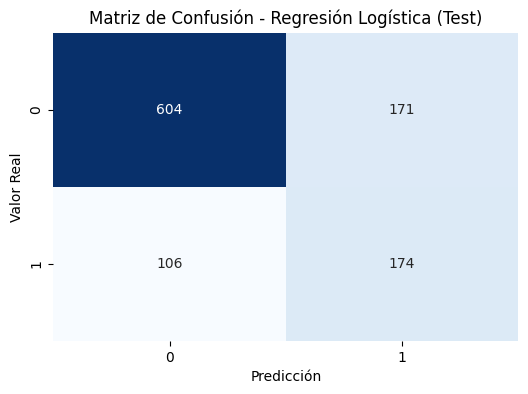

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística (Test)')
plt.show()

### Curva ROC del Modelo de Regresión Logística (Conjunto de Prueba)

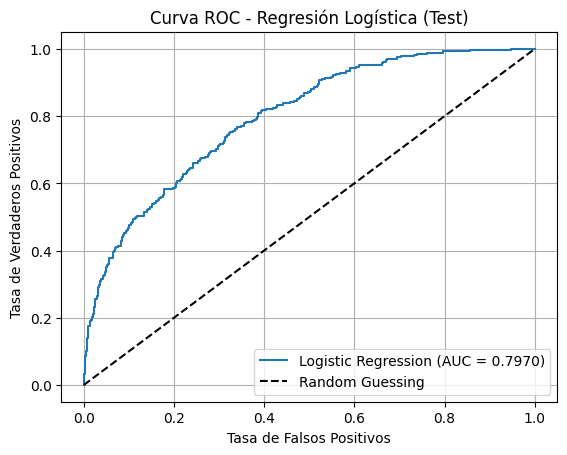

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística (Test)')
plt.legend()
plt.grid(True)
plt.show()

### Curva Precision-Recall del Modelo de Regresión Logística (Conjunto de Prueba)

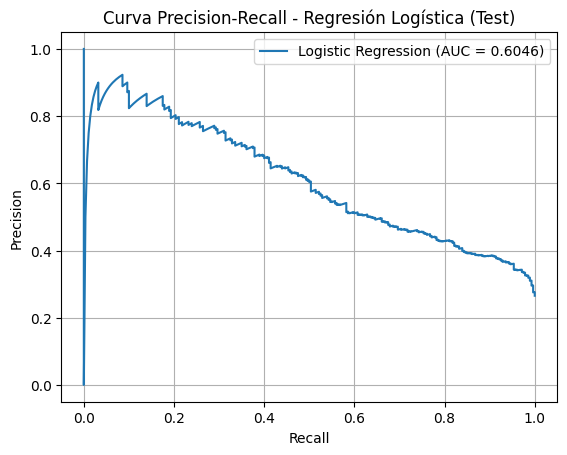

In [66]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

plt.figure()
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {pr_auc_lr:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Regresión Logística (Test)')
plt.legend()
plt.grid(True)
plt.show()

### Serialización del Modelo Ganador (Regresión Logística) con Pickle

In [67]:
import pickle
try:
  with open('modelo_champion.pkl', 'wb') as file:
      pickle.dump(lr, file)

  print("Modelo de Regresión Logística serializado con exito usando pickle.")
except Exception as e:
  print(f"Error al serializar el modelo: {e}")

Modelo de Regresión Logística serializado con exito usando pickle.


## Análisis de Factores Clave de Cancelación de Clientes y Estrategias de Retención

**Introducción:**
Este informe analiza los resultados obtenidos de un modelo predictivo de cancelación de clientes (churn) para identificar los factores clave que contribuyen a que los clientes abandonen el servicio y proponer estrategias de retención basadas en estos hallazgos.

**Análisis de Factores Influyentes (basado en Correlación y VIF):**
El análisis de correlación y el cálculo del Factor de Inflación de la Varianza (VIF) permitieron identificar variables relevantes y reducir la multicolinealidad en el conjunto de datos. Los factores que mostraron mayor influencia en la cancelación (con una correlación absoluta mayor o igual a 0.2 con la variable 'Churn\_Yes') fueron:

*   **customer.tenure:** La antigüedad del cliente parece tener una correlación negativa con la cancelación (-0.35). Esto sugiere que los clientes con mayor tiempo en el servicio son menos propensos a cancelarlo.
*   **internet.InternetService\_Fiber optic:** La presencia de servicio de internet de fibra óptica tiene una correlación positiva con la cancelación (0.31). Esto podría indicar que los clientes con este tipo de servicio son más propensos a irse.
*   **internet.InternetService\_No:** La ausencia de servicio de internet tiene una correlación negativa con la cancelación (-0.23). Los clientes sin servicio de internet son menos propensos a cancelar.
*   **account.Contract\_Two year:** Tener un contrato de dos años muestra una fuerte correlación negativa con la cancelación (-0.30). Esto es esperable, ya que un contrato a largo plazo reduce la probabilidad de churn a corto plazo.
*   **account.PaymentMethod\_Electronic check:** El método de pago con cheque electrónico presenta una correlación positiva con la cancelación (0.30). Esto podría ser un indicador de clientes con mayor propensión al churn.

**Rendimiento de los Modelos Predictivos:**
Se evaluaron cuatro modelos predictivos: Regresión Logística, Random Forest, K-Nearest Neighbors y Árbol de Decisión. Los resultados en el conjunto de validación (con oversampling por SMOTE) mostraron:

| Modelo              | Accuracy | ROC AUC Score | Precision (Churn) | Recall (Churn) | F1-Score (Churn) |
| :------------------ | :------- | :------------ | :---------------- | :------------- | :--------------- |
| Regresión Logística | 0.764    | **0.852**     | 0.54              | **0.80**       | 0.64             |
| Random Forest       | **0.807**| 0.843         | **0.64**          | 0.62           | **0.63**         |
| K-Nearest Neighbors | 0.686    | 0.756         | 0.44              | 0.70           | 0.54             |
| Árbol de Decisión   | 0.742    | 0.698         | 0.51              | 0.60           | 0.55             |

El modelo de Regresión Logística obtuvo el mejor ROC AUC score (0.852), lo que indica una buena capacidad para distinguir entre clientes que cancelan y los que no. El modelo Random Forest tuvo la mejor precisión y accuracy. Dada la importancia de identificar correctamente a los clientes que probablemente cancelen (Recall), el modelo de **Regresión Logística** se presenta como una opción sólida, aunque el Random Forest también es competitivo.

**Factores Clave que Afectan la Cancelación (basado en el análisis general y modelos):**

Considerando tanto el análisis de correlación como el desempeño de los modelos, los principales factores que influyen en la cancelación parecen ser:

*   **Antigüedad del Cliente (tenure):** Clientes con menor antigüedad son más propensos a cancelar.
*   **Tipo de Servicio de Internet (Fibra Óptica vs. No Internet):** Los clientes con fibra óptica tienen mayor propensión a cancelar, mientras que aquellos sin servicio de internet son menos propensos. Esto podría estar relacionado con las expectativas del servicio, problemas técnicos con la fibra, o la competencia en ese segmento.
*   **Tipo de Contrato (Dos años vs. otros):** Los contratos a largo plazo (dos años) son un fuerte predictor de no cancelación.
*   **Método de Pago (Cheque Electrónico):** Los clientes que utilizan cheque electrónico tienen una mayor probabilidad de cancelar.

**Estrategias de Retención Basadas en los Resultados:**

Basado en los factores identificados, se proponen las siguientes estrategias de retención:

*   **Fidelización de Clientes Nuevos:** Dado que la menor antigüedad es un predictor de churn, es crucial implementar programas de bienvenida y seguimiento intensivo para los nuevos clientes. Ofrecer soporte proactivo, resolver rápidamente cualquier problema inicial y comunicar los beneficios del servicio a largo plazo.
*   **Mejora del Servicio de Fibra Óptica:** La mayor propensión al churn entre clientes con fibra óptica sugiere posibles problemas de calidad del servicio o competencia. Se deben investigar las causas específicas (velocidad, estabilidad, soporte) y tomar medidas correctivas. Considerar programas de fidelización específicos para clientes de fibra.
*   **Incentivos para Contratos a Largo Plazo:** Promocionar activamente los contratos de dos años, ofreciendo descuentos o beneficios adicionales para incentivar a los clientes a comprometerse por un período más largo.
*   **Análisis del Método de Pago (Cheque Electrónico):** Investigar por qué los clientes que pagan con cheque electrónico tienen una mayor tasa de churn. ¿Existen problemas con el proceso de pago? ¿Este método de pago está asociado a un perfil de cliente específico más propenso a cancelar? Considerar ofrecer incentivos para cambiar a otros métodos de pago más estables.
*   **Segmentación y Ofertas Dirigidas:** Utilizar el modelo predictivo para identificar a los clientes con alto riesgo de cancelación y dirigirles ofertas de retención personalizadas, como descuentos, mejoras de servicio o atención al cliente proactiva.
*   **Monitoreo Continuo:** Implementar un sistema de monitoreo continuo del riesgo de churn utilizando el modelo serializado para identificar a los clientes en riesgo en tiempo real y activar las estrategias de retención adecuadas.

**Conclusión:**

El análisis de los datos ha permitido identificar factores clave que impulsan la cancelación de clientes. La antigüedad, el tipo de servicio de internet, la duración del contrato y el método de pago son variables importantes a considerar en las estrategias de retención. Al enfocarse en estos factores y utilizar el modelo predictivo para identificar a los clientes en riesgo, la empresa puede implementar intervenciones dirigidas para reducir la tasa de cancelación y mejorar la lealtad del cliente.